In [1]:
import os

try:
    os.chdir('/Users/cha/Desktop/공모전/삼성화재X포스텍_리스크경진대회/내코드/data/')
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")

Directory changed


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [5]:
df = pd.read_csv('유진data/GlobalTemperatures.csv')
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [7]:
df['dt'] = pd.to_datetime(df['dt'])

In [8]:
df.set_index('dt', inplace=True)

In [9]:
monthly_data = df['LandAverageTemperature'].resample('M').mean().dropna()

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
# SARIMA 모델 생성 및 학습
order = (5, 1, 0)  # SARIMA 모델 파라미터 설정 (ARIMA의 order와 동일)
seasonal_order = (1, 1, 1, 12)  # 계절성 파라미터 설정 (12개월 주기)
model = SARIMAX(monthly_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=0)

/Users/cha/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/cha/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 필요한 열만 선택
data = df[['LandAverageTemperature']]

Modeling

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [15]:
data.shape[0]

3192

In [16]:
data

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [17]:
yearly_average = data.resample('Y').mean()

In [18]:
yearly_average

,LandAverageTemperature
dt,
1750-12-31,8.719364
1751-12-31,7.976143
1752-12-31,5.779833
1753-12-31,8.388083
1754-12-31,8.469333
...,...
2011-12-31,9.516000
2012-12-31,9.507333
2013-12-31,9.606500


In [19]:
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

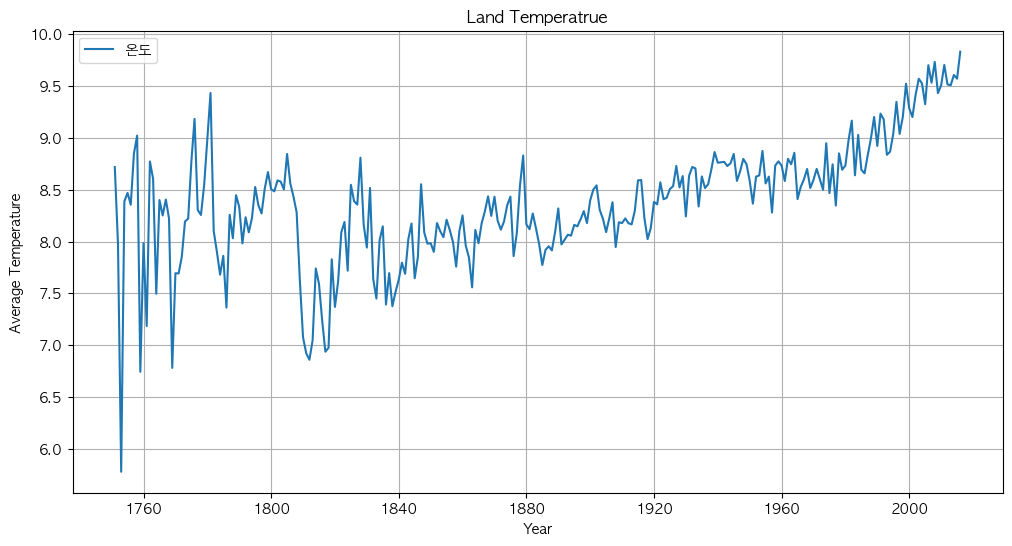

In [21]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
#font_path = "/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttff"  # 사용할 한글 폰트 경로
#plt.rcParams['font.family'] = 'humor sans'  # 폰트 이름 지정

# 시계열 데이터를 시각화합니다.
plt.figure(figsize=(12, 6))
plt.plot(yearly_average.index, yearly_average["LandAverageTemperature"], label="온도")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.title("Land Temperatrue")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg

In [23]:
time_series = yearly_average["LandAverageTemperature"]

In [24]:
# 차분 함수 정의
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

# 차분 적용 (예: 차분 차수 d=1)
differenced_data = difference(time_series, interval=1)

# 정상성 검정 (Augmented Dickey-Fuller 검정)
result = adfuller(differenced_data)
print('ADF 통계량: %f' % result[0])
print('p-value: %f' % result[1])
print('크리티컬 값: %s' % result[4])

# ADF 검정 결과 해석
if result[1] <= 0.05:
    print("시계열 데이터는 정상 시계열입니다.")
else:
    print("시계열 데이터는 정상 시계열이 아닙니다.")

ADF 통계량: -6.683857
p-value: 0.000000
크리티컬 값: {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}
시계열 데이터는 정상 시계열입니다.


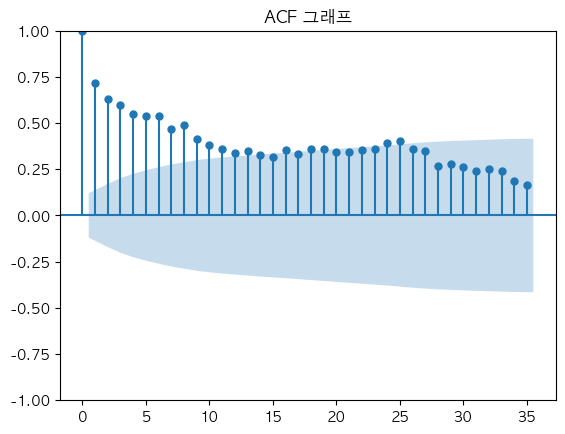

In [25]:
# ACF 그래프 그리기
sm.graphics.tsa.plot_acf(time_series, lags=35)  # lags는 확인할 시차 (lag) 개수
plt.title("ACF 그래프")
plt.show()


ACF(Autocorrelation Function) 그래프에서 모든 시차(lag)에 대한 자기상관값(ACF 값)이 0을 넘어간다는 것은 MA(Moving Average) 부분의 시차(q)를 선택하기 어렵게 만드는 상황. 일반적으로 ACF 그래프에서 첫 번째로 자기상관값이 0을 넘어가는 시차를 q 값으로 선택하는 것이 일반적이지만, 그런 경우에는 MA(q) 모델이 잘 동작하지 않을 수 있음.
1. PACF에서 q값을 선정
2.모델 선택 기준 (Information Criteria): AIC(Akaike Information Criterion) 또는 BIC(Bayesian Information Criterion)와 같은 정보 기준을 사용하여 다양한 q 값을 시도하고 모델의 적합도와 복잡성을 고려하여 최적의 q 값 선정
3.SARIMA 모델 사용

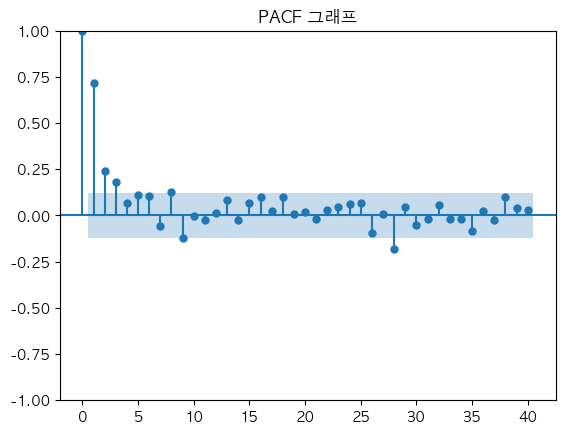

In [26]:
# PACF 그래프 그리기
sm.graphics.tsa.plot_pacf(time_series, lags=40)  # lags는 확인할 시차 (lag) 개수
plt.title("PACF 그래프")
plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(yearly_average["LandAverageTemperature"], order=(3, 2, 4))  # ARIMA(p, d, q) 모델, 여기서는 예시로 (1, 1, 1)을 사용합니다.
model_fit = model.fit()

/Users/cha/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
forecast_steps = 35  # 예측할 스텝 수 (일 수)
forecast = model_fit.forecast(steps=forecast_steps)

In [29]:
date_range = pd.date_range(start='2015-12-31', periods=forecast_steps, freq='D')
predictions_df = pd.DataFrame({
    "PredictedTemperature": forecast
})

In [30]:
predictions_df

,PredictedTemperature
2016-12-31,9.688490
2017-12-31,9.577078
2018-12-31,9.716456
2019-12-31,9.560049
2020-12-31,9.707967
2021-12-31,9.617400
2022-12-31,9.659739
2023-12-31,9.688385
2024-12-31,9.625957
2025-12-31,9.724680


In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 10))

line1 = ax1.plot(bean['Year'], bean['Arabica coffee production'], label='Arabica Price', color='r')
line2 = ax1.plot(bean['Year'], bean['Robusta coffee production'], label='Robusta Price', color='b')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('1,000 60 kilogram bags', fontdict={'fontsize':15})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
# plt.xticks(A.index[::200], A.index[::200].strftime('%Y-%m-%d'), rotation=45)
plt.title('Coffee Bean Production', fontdict = {'fontsize' : 30})
plt.rcParams['font.size'] = 15
plt.show()

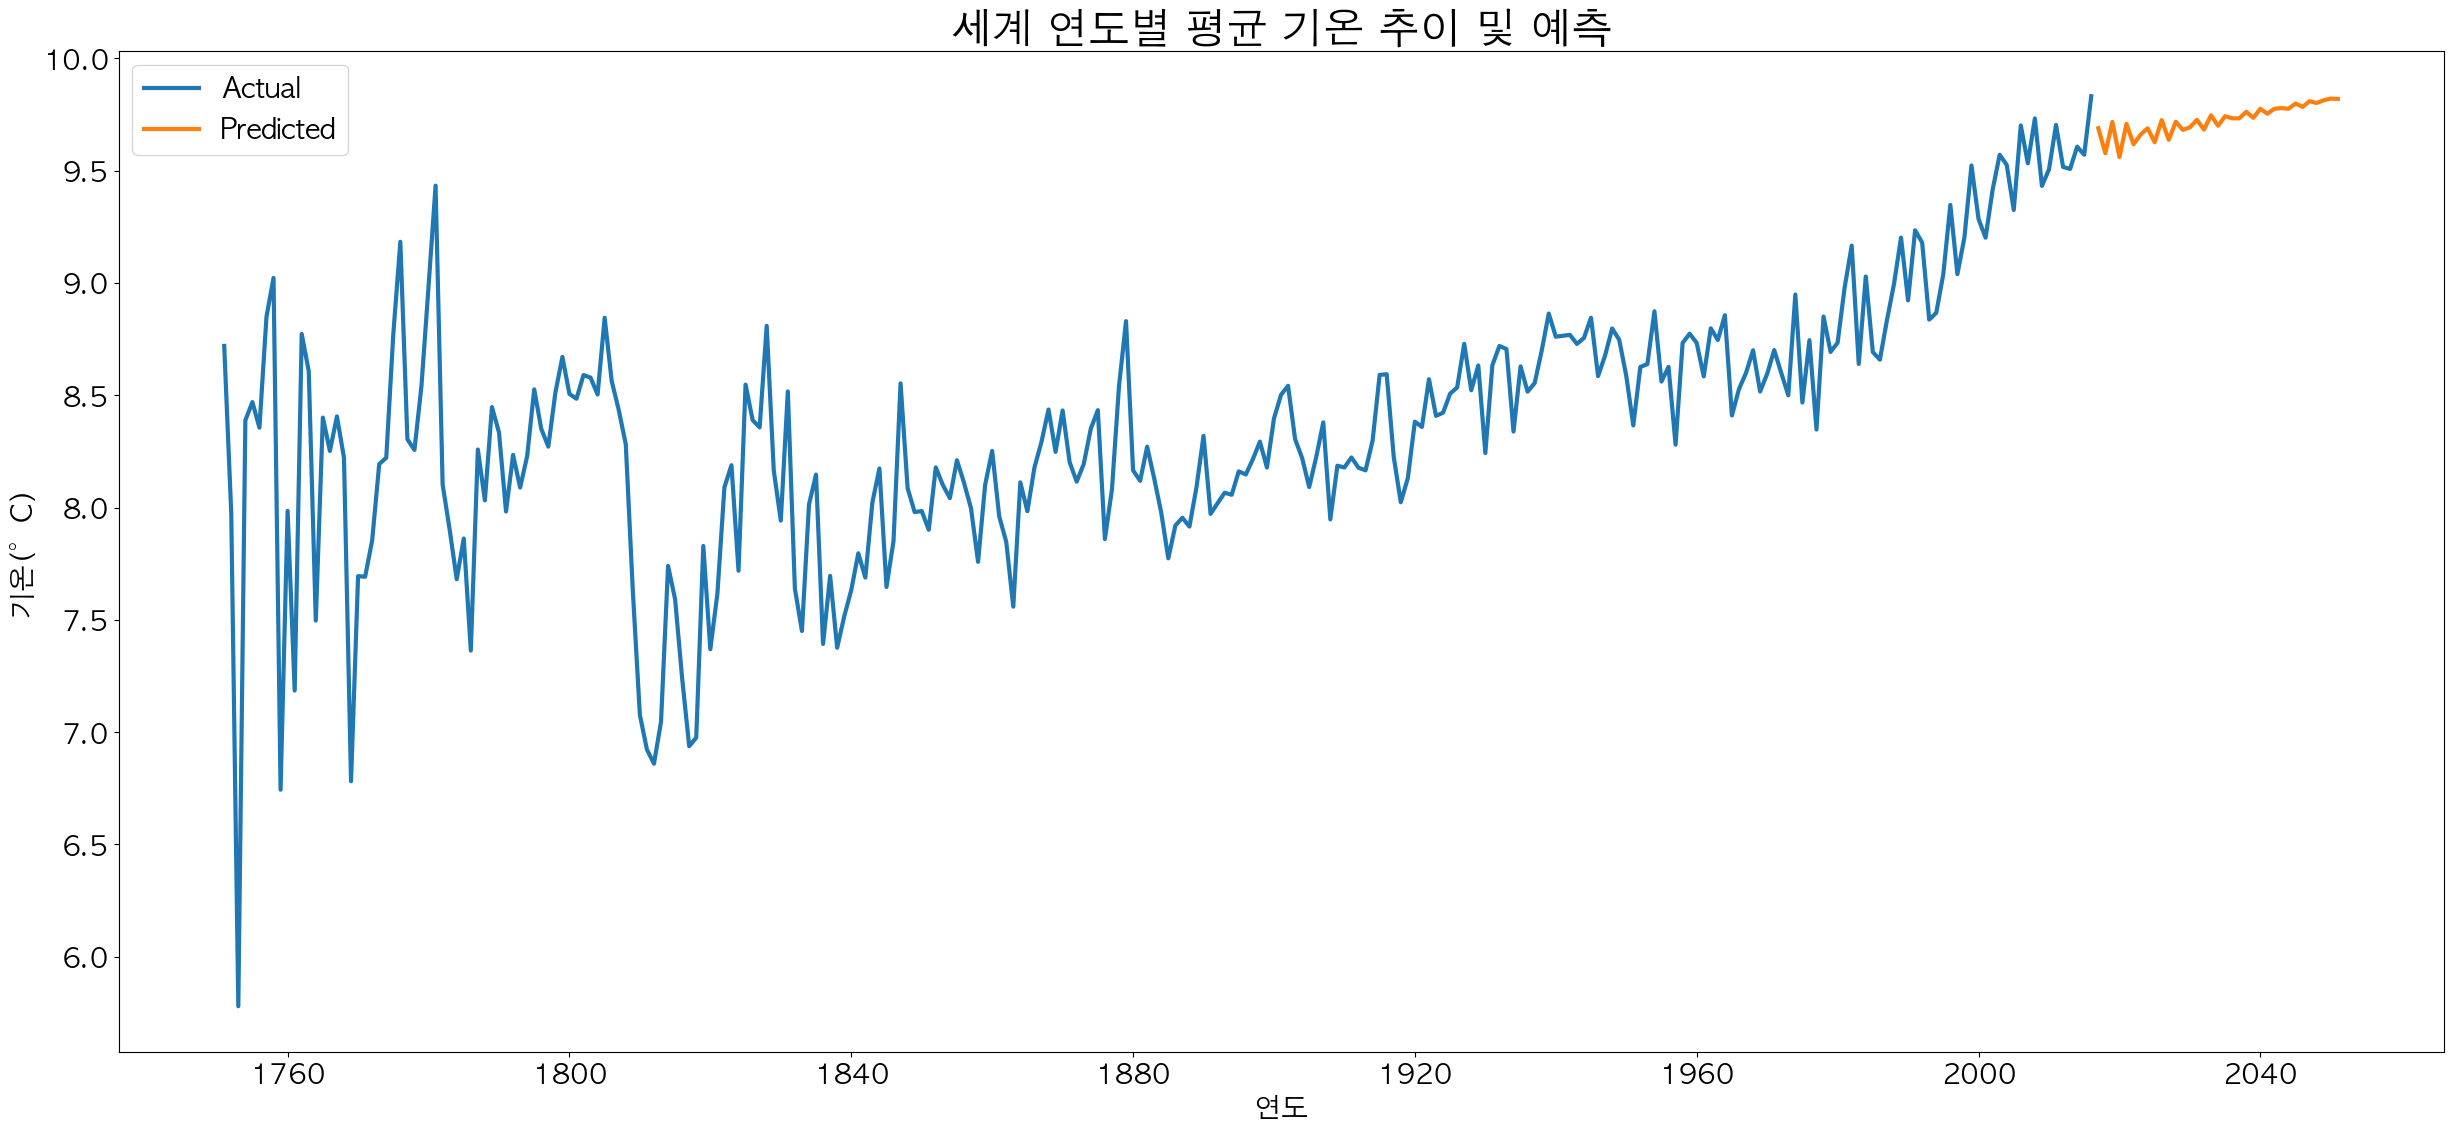

In [52]:
# 두 데이터 프레임 합치기
combined_df = pd.concat([yearly_average, predictions_df])

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(30, 13))
line1 = ax1.plot(combined_df.index, combined_df['LandAverageTemperature'], label='Actual',linewidth=3)
line2 = ax1.plot(predictions_df.index, predictions_df['PredictedTemperature'], label='Predicted',linewidth=3)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='lower right')
ax1.set_xlabel('연도')
ax1.set_ylabel('기온(°C)')
plt.title('세계 연도별 평균 기온 추이 및 예측', fontdict = {'fontsize' : 30})
# plt.xticks(combined_df.index[::120], rotation=0)
plt.rcParams['font.size'] = 20
plt.legend()
plt.show()

pacf 그래프로 q값을 결정했더니 추세가 이상함.

In [165]:
from itertools import product

In [233]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ARIMA 모델 생성 및 피팅
model1 = ARIMA(time_series, order=(3, 2, 4))

model1_fit = model1.fit()

# 예측값 계산
y_pred = model1_fit.predict(typ='levels')

# 실제값 (주어진 데이터)와 예측값 간의 비교
y_true = time_series

# MSE (Mean Squared Error) 계산
mse = mean_squared_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# R-squared 계산
r2 = r2_score(y_true, y_pred1)


print("Model - MSE:", mse)
print("Model - MAE:", mae)
print("Model - RMSE:", rmse)
print("Model - R-squared:", r2_1)


Model - MSE: 0.5703853781592197
Model - MAE: 0.3098215607452042
Model - RMSE: 0.7552386233232644
Model - R-squared: -0.6828313716991261


In [240]:
#원래 최적값...
# import itertools
# # p, d, q 값 후보 리스트
# p_values = [0, 1, 2, 3]
# d_values = [0, 1, 2]
# q_values = [0, 1, 2, 3]

# best_score = float('inf')  # 최적의 성능 지표 값을 저장할 변수 초기화
# best_p, best_d, best_q = None, None, None  # 최적의 p, d, q 값 초기화

# # 모든 p, d, q 값의 조합을 반복하여 성능 비교
# for p, d, q in itertools.product(p_values, d_values, q_values):
#     try:
#         # ARIMA 모델 학습
#         model = ARIMA(time_series, order=(p, d, q))
#         model_fit = model.fit()

#         # 예측
#         predictions = model_fit.predict()

#         # 예측 성능 지표 계산
#         mse = mean_squared_error(time_series, predictions)
#         mae = mean_absolute_error(time_series, predictions)
#         r2 = r2_score(time_series, predictions)

#         # 가장 우수한 성능 지표 업데이트
#         if mse < best_score:
#             best_score = mse
#             best_p, best_d, best_q = p, d, q

#     except Exception as e:
#         continue

# # 최적의 p, d, q 값과 해당 성능 지표 출력
# print(f"Best p: {best_p}, Best d: {best_d}, Best q: {best_q}")
# print(f"Best MSE: {best_score}")